In [2]:
## kernal == GOGO

In [1]:
from sgfmill import sgf
# from enum import Enum
import numpy as np
import  matplotlib.pyplot as plt
import glob
import random

In [2]:
#計算有沒有死掉的棋
def check_and_remove_dead_stones(board, x, y):
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    rows, cols = board.shape

    def dfs(i, j, color):
        if i < 0 or i >= rows or j < 0 or j >= cols or visited[i][j] or board[i][j] != color:
            return []
        visited[i][j] = True
        group = [(i, j)]
        for dx, dy in directions:
            group.extend(dfs(i + dx, j + dy, color))
        return group

    def count_liberties(group):
        liberties = set()
        for i, j in group:
            for dx, dy in directions:
                ni, nj = i + dx, j + dy
                if 0 <= ni < rows and 0 <= nj < cols and board[ni][nj] == 0:
                    liberties.add((ni, nj))
        return len(liberties)

    visited = np.zeros((rows, cols), dtype=bool)
    for dx, dy in directions:
        nx, ny = x + dx, y + dy
        if 0 <= nx < rows and 0 <= ny < cols and board[nx][ny] != 0 and not visited[nx][ny]:
            group = dfs(nx, ny, board[nx][ny])
            if count_liberties(group) == 0:
                for i, j in group:
                    board[i][j] = 0  # Remove dead stones

In [3]:
#判斷黑白棋的附近範圍(十字)
def area_judge(X, area,color):
    board_value = 1 if color == 'b' else 2 
    other_value = 2 if color == 'b' else 1 
    for i in range(1,18):
        for j in range(1,18):
            #判斷黑白棋
            if X[i][j] == board_value:
                area[i][j] += 5
                if X[i+1][j] != other_value:
                    area[i+1][j] += 5
                if X[i-1][j] != other_value:
                    area[i-1][j] += 5
                if X[i][j+1] != other_value:
                    area[i][j+1] += 5
                if X[i][j-1] != other_value:
                    area[i][j-1] += 5             
            elif X[i][j] == other_value:
                area[i][j]  -= 5
                if X[i+1][j] != board_value:
                    area[i+1][j] -= 5
                if X[i-1][j] != board_value:
                    area[i-1][j] -= 5
                if X[i][j+1] != board_value:
                    area[i][j+1] -= 5
                if X[i][j-1] != board_value:
                    area[i][j-1] -= 5  
    return area                

In [4]:
def areamap(original_matrix_v5,range_11): # original_matrix_v5: 原始board, range_11:未來board
    for i in range(19):
        for j in range(19):
            # 檢查是不是0
            if original_matrix_v5[i][j] == 0:
                
                count2 = 0
                yes2 = True
                for k in range(1,6):
                    if i+k < 19:
                        if original_matrix_v5[i+k][j] == 2:
                            yes2 = False
                            break
                        elif original_matrix_v5[i+k][j] == 1:
                            count2 += 1
                            break
                for k in range(1,6):
                    if i-k >= 0:
                        if original_matrix_v5[i-k][j] == 2:
                            yes2 = False
                            break
                        elif original_matrix_v5[i-k][j] == 1:
                            count2 += 1
                            break        
                for k in range(1,6): 
                    if j+k < 19:
                        if original_matrix_v5[i][j+k] == 2:
                            yes2 = False
                            break
                        elif original_matrix_v5[i][j+k] == 1:
                            count2 += 1
                            break               
                for k in range(1,6):
                    if j-k >=0 :
                        if original_matrix_v5[i][j-k] == 2:
                            yes2 = False
                            break
                        elif original_matrix_v5[i][j-k] == 1:
                            count2 += 1
                            break
                if ( yes2== True) and (count2 > 0):
                    range_11[i][j] = 1 
                
                
                count1 = 0
                yes1 = True
                for k in range(1,6):
                    if i+k < 19:
                        if original_matrix_v5[i+k][j] == 1:
                            yes1 = False
                            break
                        elif original_matrix_v5[i+k][j] == 2:
                            count1 += 1
                            break    
                for k in range(1,6):    
                    if i-k >= 0:
                        if original_matrix_v5[i-k][j] == 1:
                            yes1 = False
                            break
                        elif original_matrix_v5[i-k][j] == 2:
                            count1 += 1
                            break        
                for k in range(1,6):  
                    if j+k < 19:
                        if original_matrix_v5[i][j+k] == 1:
                            yes1 = False
                            break
                        elif original_matrix_v5[i][j+k] == 2:
                            count1 += 1
                            break                      
                for k in range(1,6):
                    if j-k >=0 :
                        if original_matrix_v5[i][j-k] == 1:
                            yes1 = False
                            break
                        elif original_matrix_v5[i][j-k] == 2:
                            count1 += 1
                            break                               
                if ( yes1== True) and (count1 > 0):
                    range_11[i][j] = 2 
                
        
    return  range_11                        

                
                

In [5]:
#找棋盤每一個空地附近黑白子遠近

def space_far(board):

    space_farb = np.zeros((19,19), dtype=int)
    space_farw = np.zeros((19,19), dtype=int)

    for i in range(19):
        for j in range(19):
            if board[i][j] ==0:
                count = 1
                Find = False
                
                #找空地旁邊的子
                while (Find == False) and (count <= 19):
                    
                    arround = []
                    for dx in range(-1*count,count+1):
                        for dy in range(-1*count,count+1):
                            ni, nj = i + dx, j + dy
                            if 0 <= ni < 19 and 0 <= nj < 19:
                                
                                arround.append(board[ni][nj])
                                
                                
                                # if board[ni][nj] == 1:
                                #     space_farb[i][j] = count
                                # elif  board[ni][nj] == 2:
                                #     space_farb[i][j] = count
                    # print(arround)
                    
                    if (space_farb[i][j] == 0) and (1 in arround):
                        space_farb[i][j] = count
                    
                    if (space_farw[i][j] == 0 ) and (2  in arround):
                        space_farw[i][j] = count
                        
                            
                    if (space_farb[i][j] != 0 )and (space_farw[i][j] != 0):
                        Find = True
                        
                    else:
                        count += 1     
                    
    return space_farb , space_farw

In [6]:
#黑白棋連接棋子的數量
def connect_num(board):
    
    # Initialize the result matrices for black and white stones
    result_black = [[0 for _ in range(len(board[0]))] for _ in range(len(board))]
    result_white = [[0 for _ in range(len(board[0]))] for _ in range(len(board))]

    # Helper function to perform DFS and count connected stones
    def dfs(i, j, color, visited):
        if i < 0 or i >= len(board) or j < 0 or j >= len(board[0]) or visited[i][j] or board[i][j] != color:
            return 0
        
        visited[i][j] = True
        
        count = 1  # Count the current stone
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            count += dfs(i + dx, j + dy, color, visited)
        
        return count

    # Traverse the board to count connected stones for each position
    for i in range(len(board)):
        for j in range(len(board[0])):
            if board[i][j] != 0:  # Ignore empty spots
                visited = [[False for _ in range(len(board[0]))] for _ in range(len(board))]
                count = dfs(i, j, board[i][j], visited)
                
                # Update the result matrices
                for x in range(len(board)):
                    for y in range(len(board[0])):
                        if visited[x][y]:
                            if board[i][j] == 1:
                                result_white[x][y] = count
                            else:
                                result_black[x][y] = count
    
    return result_black ,  result_white        
       


In [7]:
# 計算黑白棋氣數
def calculate_liberties(board):
    rows, cols = len(board), len(board[0])
    black_liberty = [[0 for _ in range(cols)] for _ in range(rows)]
    white_liberty = [[0 for _ in range(cols)] for _ in range(rows)]
    visited = [[False for _ in range(cols)] for _ in range(rows)]
    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    
    def dfs(i, j, color):
        if i < 0 or i >= rows or j < 0 or j >= cols or visited[i][j] or board[i][j] != color:
            return []
        visited[i][j] = True
        group = [(i, j)]
        for dx, dy in directions:
            group.extend(dfs(i + dx, j + dy, color))
        return group
    
    def count_liberties(group):
        liberties = set()
        for i, j in group:
            for dx, dy in directions:
                ni, nj = i + dx, j + dy
                if 0 <= ni < rows and 0 <= nj < cols and board[ni][nj] == 0:
                    liberties.add((ni, nj))
        return len(liberties)
    
    for i in range(rows):
        for j in range(cols):
            if not visited[i][j] and board[i][j] != 0:
                group = dfs(i, j, board[i][j])
                liberties = count_liberties(group)
                for x, y in group:
                    if board[i][j] == 1:
                        black_liberty[x][y] = liberties
                    else:
                        white_liberty[x][y] = liberties
    
    return black_liberty, white_liberty


# black_liberty_map, white_liberty_map = calculate_liberties(board)


In [8]:
def sgf_to_array(sgf_content):
    
    sgf_X = []
    sgf_Y = []
    sgf_game = sgf.Sgf_game.from_bytes(sgf_content)
    board_size = 19
    
    #每個棋譜取10個資料
    # 設置種子
    # random.seed(1123)
    # 從棋譜步數之間取10個不重複的整數
    random_integers = random.sample(range(3, len(sgf_game.get_main_sequence())-1), 4)
    # random_integers  = [len(sgf_game.get_main_sequence())-2]
    for idx,num in enumerate(random_integers):
        
        X = []
        Y = []    
        board = np.zeros((19,19), dtype=int)
        pre_step = np.zeros((19,19), dtype=int)

        #最後一步num
        for node in sgf_game.get_main_sequence()[num]: 
            move = node.get_move()
            # print(move)
            if move is not None:
                color, (x, y) = move
                
                # 將這一步棋作為目標（Y）添加
                next_move = np.zeros((19, 19), dtype=int)
                next_move[x, y] = 1            
                Y.append(next_move.copy())
                
                #要預測的是黑是白(換黑換白)
                board_value_b = 1 if color == 'b' else 0  # 1 for black, 0 for white
                board_value_w = 1 if color == 'w' else 0
                # print (board_value_b)
                predict_color_b = np.full((19, 19), board_value_b)     
                # print(predict_color_b)      
                predict_color_w = np.full((19, 19), board_value_w)
                
                X.append(predict_color_b)
                X.append(predict_color_w)
                
        # 黑白棋勢力
        for node in sgf_game.get_main_sequence()[1:num+1]:  # 跳過根節點
            move = node.get_move()            
            if move is not None:
                color, (x, y) = move
                board_value = 1 if color == 'b' else 2  # 1 for black, 2 for white
                board[x, y] = board_value
                #死子確認和移除
                check_and_remove_dead_stones(board, x, y)     
                    
        area = board.copy()
        # print(area)
        #空格
        X.append((board == 0).astype(int))
        # 黑白棋位置
        X.append((board == 1).astype(int))
        X.append((board == 2).astype(int))
        
        
        
        #增加全部為1的feature plane
        # X.append(np.full((19, 19), 1))
                 
        Step_move = sgf_game.get_main_sequence()[1:num+1]#跳過跟節點 跟目標值
        # 下棋點前五步棋    
        pre_5step = np.zeros((19,19), dtype=int)
        count = 0
        for node in range(-5,0): #Step_move[-6:-1]:  # 跳過最後一步 -9~-2
            # pre_5step = np.zeros((19,19), dtype=int)
            count += 1
            try: 
                move = Step_move[node].get_move()
                # count  += 1
                # print('for圈圈')
            
                if move is not None:
                    color, (x, y) = move
                    # board_value = 1 if color == 'b' else 2  # 1 for black, 2 for white
                    pre_5step[x, y] = count # board_value
                    # X.append(pre_5step)
            except:
                pass
                # X.append(np.zeros((19,19), dtype=int))            
        X.append(pre_5step / np.linalg.norm(pre_5step))        
        
                
        # 計算黑白棋氣數
        BLM,WLM = calculate_liberties(board.copy())
        # print(BLM)
        BLM_ =  [[-num for num in sublist] for sublist in BLM]
        # print(BLM_)
        # print(BLM_ / np.linalg.norm(BLM_))
        WLM_ =  [[-num for num in sublist] for sublist in WLM]

        min_value = min(min(x for x in sublist ) for sublist in BLM_)
        # print(min_value)
        # print(BLM_)
        BLM__ = [[x + abs(min_value) + 1 if x != 0 else 0 for x in sublist] for sublist in BLM_]
        # print(BLM__)
        # BLM__ = BLM__ / np.linalg.norm(BLM__)
        
        X.append(BLM__ / np.linalg.norm(BLM__)) #/ np.linalg.norm(BLM_))
        
        
        min_value = min(min(x for x in sublist ) for sublist in WLM_)
        # print(min_value)
        # print(BLM_)
        if min_value != 0:
            WLM__ = [[x + abs(min_value) + 1 if x != 0 else 0 for x in sublist] for sublist in WLM_]
            # print(BLM__)
            # BLM__ = BLM__ / np.linalg.norm(BLM__)
            
            X.append(WLM__ / np.linalg.norm(WLM__)) #/ np.linalg.norm(BLM_))
        else:
            # 處理零或無效範數的情況，通過向 X 添加一個零向量
            X.append(np.zeros((19,19), dtype=int)) 
        

        
        
        
        #黑白棋腹地(簡易版)
        Area = areamap(board,board.copy())
        Area = areamap(Area,Area.copy())
        X.append((Area == 1).astype(int))
        X.append((Area == 2).astype(int))


        sgf_X.append(X)
        sgf_Y.append(Y)
        
    return np.array(sgf_X) , np.array(sgf_Y) ,np.array(random_integers)
        # return board
        

In [9]:
sgf_path = 'E:/research/AIcup_GO/TrainingData/organize/Dan/all_SGF/*.sgf'

path_list = glob.glob(sgf_path)
len(path_list)

100160

In [51]:
all_num = []

In [54]:
XX = []
yy = []   
print('x_path:' ,0)      
for idx , i in enumerate(path_list[:1]):
    # print(path)
    # step_list = train_data[idx].split(',')
    
    # print('y_path:' ,step_list[0],step_list[1])
    
    with open(path_list[idx], "rb") as f:
        sgf_content = f.read()
    X ,y , RI = sgf_to_array(sgf_content)
    # transposed_array = X.transpose(( 1, 2 ,0))
    

    XX.append(X)
    
    yy.append(y)
    
    all_num.append(RI)
    # yy.append(int(step_list[1]))

x_path: 0


In [55]:
np.array(XX).shape,np.array(yy).shape

((1, 4, 10, 19, 19), (1, 4, 1, 19, 19))

x_path: 0


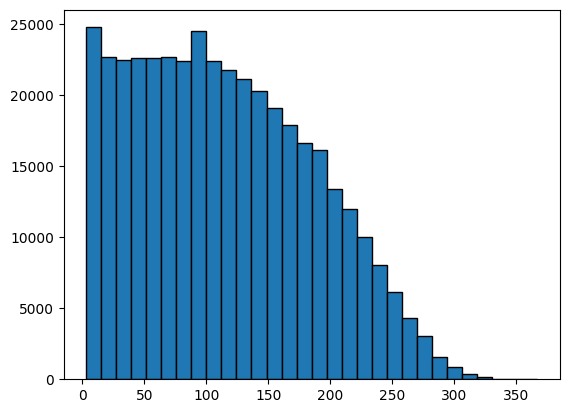

x_path: 100000


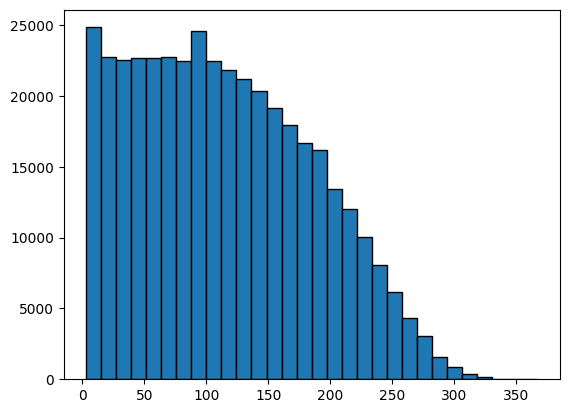

In [57]:
for n in range(0,len(path_list),100000):
    all_num = []
    XX = []
    yy = []   
    print('x_path:' ,n)      
    for idx , i in enumerate(path_list[n:n+100000]):
        # print(path)
        # step_list = train_data[idx].split(',')
        
        # print('y_path:' ,step_list[0],step_list[1])
        
        with open(path_list[idx], "rb") as f:
            sgf_content = f.read()
        X ,y , RI = sgf_to_array(sgf_content)
        # transposed_array = X.transpose(( 1, 2 ,0))
        

        XX.append(X)
        
        yy.append(y)
        
        all_num.append(RI)
        # yy.append(int(step_list[1]))
        
    flat_data = np.array(all_num).flatten()

    # 繪製直方圖
    plt.hist(flat_data, bins=30, edgecolor='k')
    plt.show()
    
    
    XX = np.array(XX)
    yy = np.array(yy)
    
    train_npz_path = 'E:/research/AIcup_GO/TrainingData/organize/Dan/Design_feature_NPZ/1125_Dan_newf10_fix/Dan_train_dataset6_feature10_v2_times4_batch100000_' + str(n) + '.npz'
    np.savez(train_npz_path, x_train=XX, y_train=yy)    
    
# 58mins    

In [ ]:
sgf_path = 'E:/research/AIcup_GO/TrainingData/organize/Kyu/all_SGF/*.sgf'

path_list = glob.glob(sgf_path)
len(path_list)

118500

x_path: 0


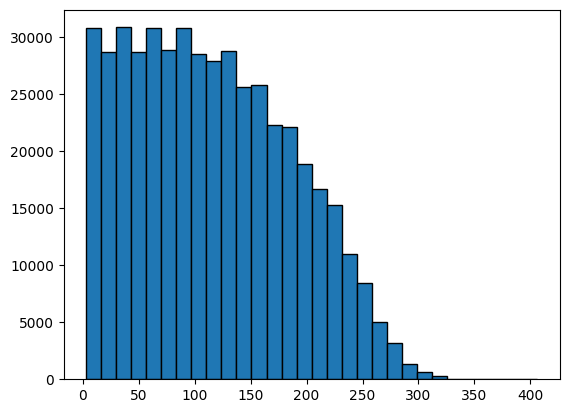

x_path: 118000


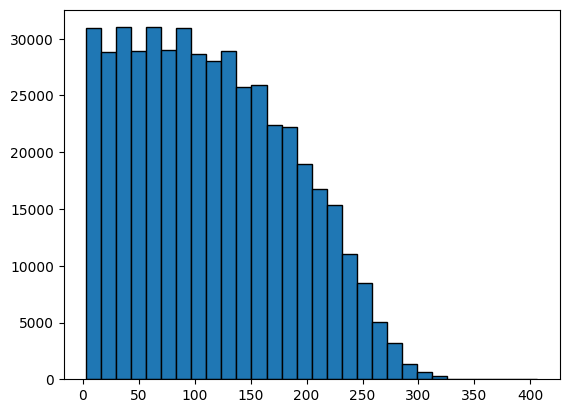

In [ ]:
all_num = []
for n in range(0,len(path_list),118000):
    XX = []
    yy = []   
    print('x_path:' ,n)      
    for idx , i in enumerate(path_list[n:n+118000]):

        
        with open(path_list[idx], "rb") as f:
            sgf_content = f.read()
            
        X ,y , RI = sgf_to_array(sgf_content)

        XX.append(X)
        
        yy.append(y)
        
        all_num.append(RI)
        
    flat_data = np.array(all_num).flatten()

    # 繪製直方圖
    plt.hist(flat_data, bins=30, edgecolor='k')
    plt.show()
    
    
    XX = np.array(XX)
    yy = np.array(yy)
    
    train_npz_path = 'E:/research/AIcup_GO/TrainingData/organize/Kyu/Design_feature_NPZ/1125_Kyu_newf10_fix/Kyu_train_dataset6_feature10_v2_times4_batch100000_' + str(n) + '.npz'
    np.savez(train_npz_path, x_train=XX, y_train=yy)    
    
# 58mins    